In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.getcwd())
print(os.listdir())

/Users/michellehsu/Desktop/Kaggle
['.DS_Store', '.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'Home Credit Default Risk.ipynb', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [123]:
#Read the data
app_train = pd.read_csv("application_train.csv")
app_test = pd.read_csv("application_test.csv")
bureau = pd.read_csv('bureau.csv')
bureau_bal = pd.read_csv('bureau_balance.csv')
credit_card_bal = pd.read_csv('credit_card_balance.csv')
installments = pd.read_csv('installments_payments.csv')
pos_cash_bal = pd.read_csv('POS_CASH_balance.csv')
previous_app = pd.read_csv('previous_application.csv')

In [5]:
data = [['app_train', len(app_train)], 
        ['app_test', len(app_test)],
        ['bureau', len(bureau)],
        ['bureau_bal', len(bureau_bal)],
        ['credit_card_bal', len(credit_card_bal)],
        ['installments', len(installments)],
        ['pos_cash_bal', len(pos_cash_bal)],
        ['previous_app', len(previous_app)]]
data_summary = pd.DataFrame(data = data, columns = ['data', 'num_rows'])
data_summary

,data,num_rows
0,app_train,307511
1,app_test,48744
2,bureau,1716428
3,bureau_bal,27299925
4,credit_card_bal,3840312
5,installments,13605401
6,pos_cash_bal,10001358
7,previous_app,1670214


# Part 1: Exploratory Data Analysis

## 1.1 application_train

> - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
> - Static data for all applications. One row represents one loan in our data sample.

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
print(len(app_train))

307511


In [8]:
print(app_train.columns)
print(app_train.info())

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [9]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### a. Imbalanced Data

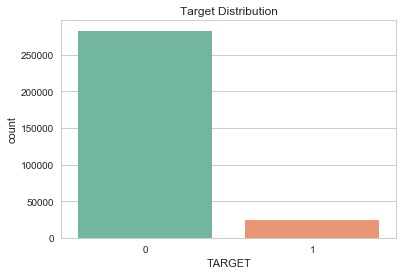

In [138]:
sns.set_style('whitegrid')
sns.countplot(x = app_train['TARGET'], palette = 'Set2')
plt.title('Target Distribution')
plt.show()

In [11]:
app_train['TARGET'].value_counts()/len(app_train)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

The data is imbalanced in a way that only 8.1% of the applications default and the rest of the applications do not default.

### b. Missing value

In [12]:
#Over 97% of records have missing value
(app_train.isnull().sum(axis = 1) > 0).sum()/len(app_train)

0.97202701691971993

In [13]:
app_train_missing = app_train.isnull().sum()[app_train.isnull().sum() != 0]/len(app_train)*100

In [14]:
#filter features with over 50 % of the missing values 
app_train_missing.sort_values(ascending= False)[app_train_missing > 50]

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MODE           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MEDI           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_AVG           55.179164
NONLIVINGAREA_MODE          55.179164
NONLIVINGARE

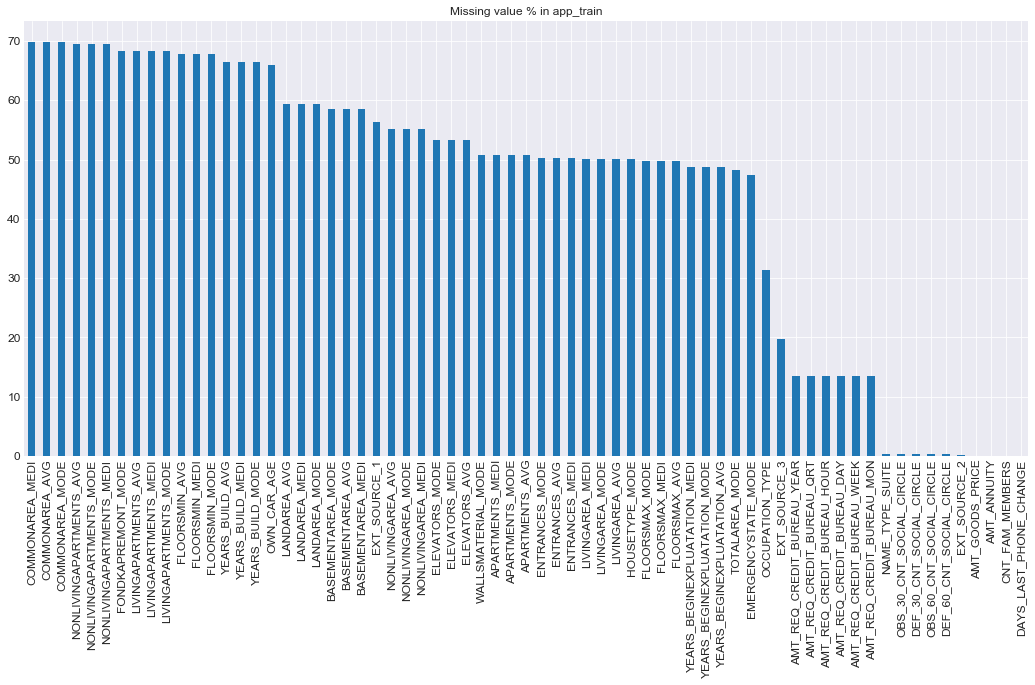

In [15]:
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
axis_font = {'size':'12'}
app_train_missing.sort_values(ascending= False).plot.bar()
plt.title("Missing value % in app_train", **axis_font)
plt.xticks(rotation=90, **axis_font) 
plt.yticks(**axis_font) 
plt.show()

In [16]:
import missingno as msno

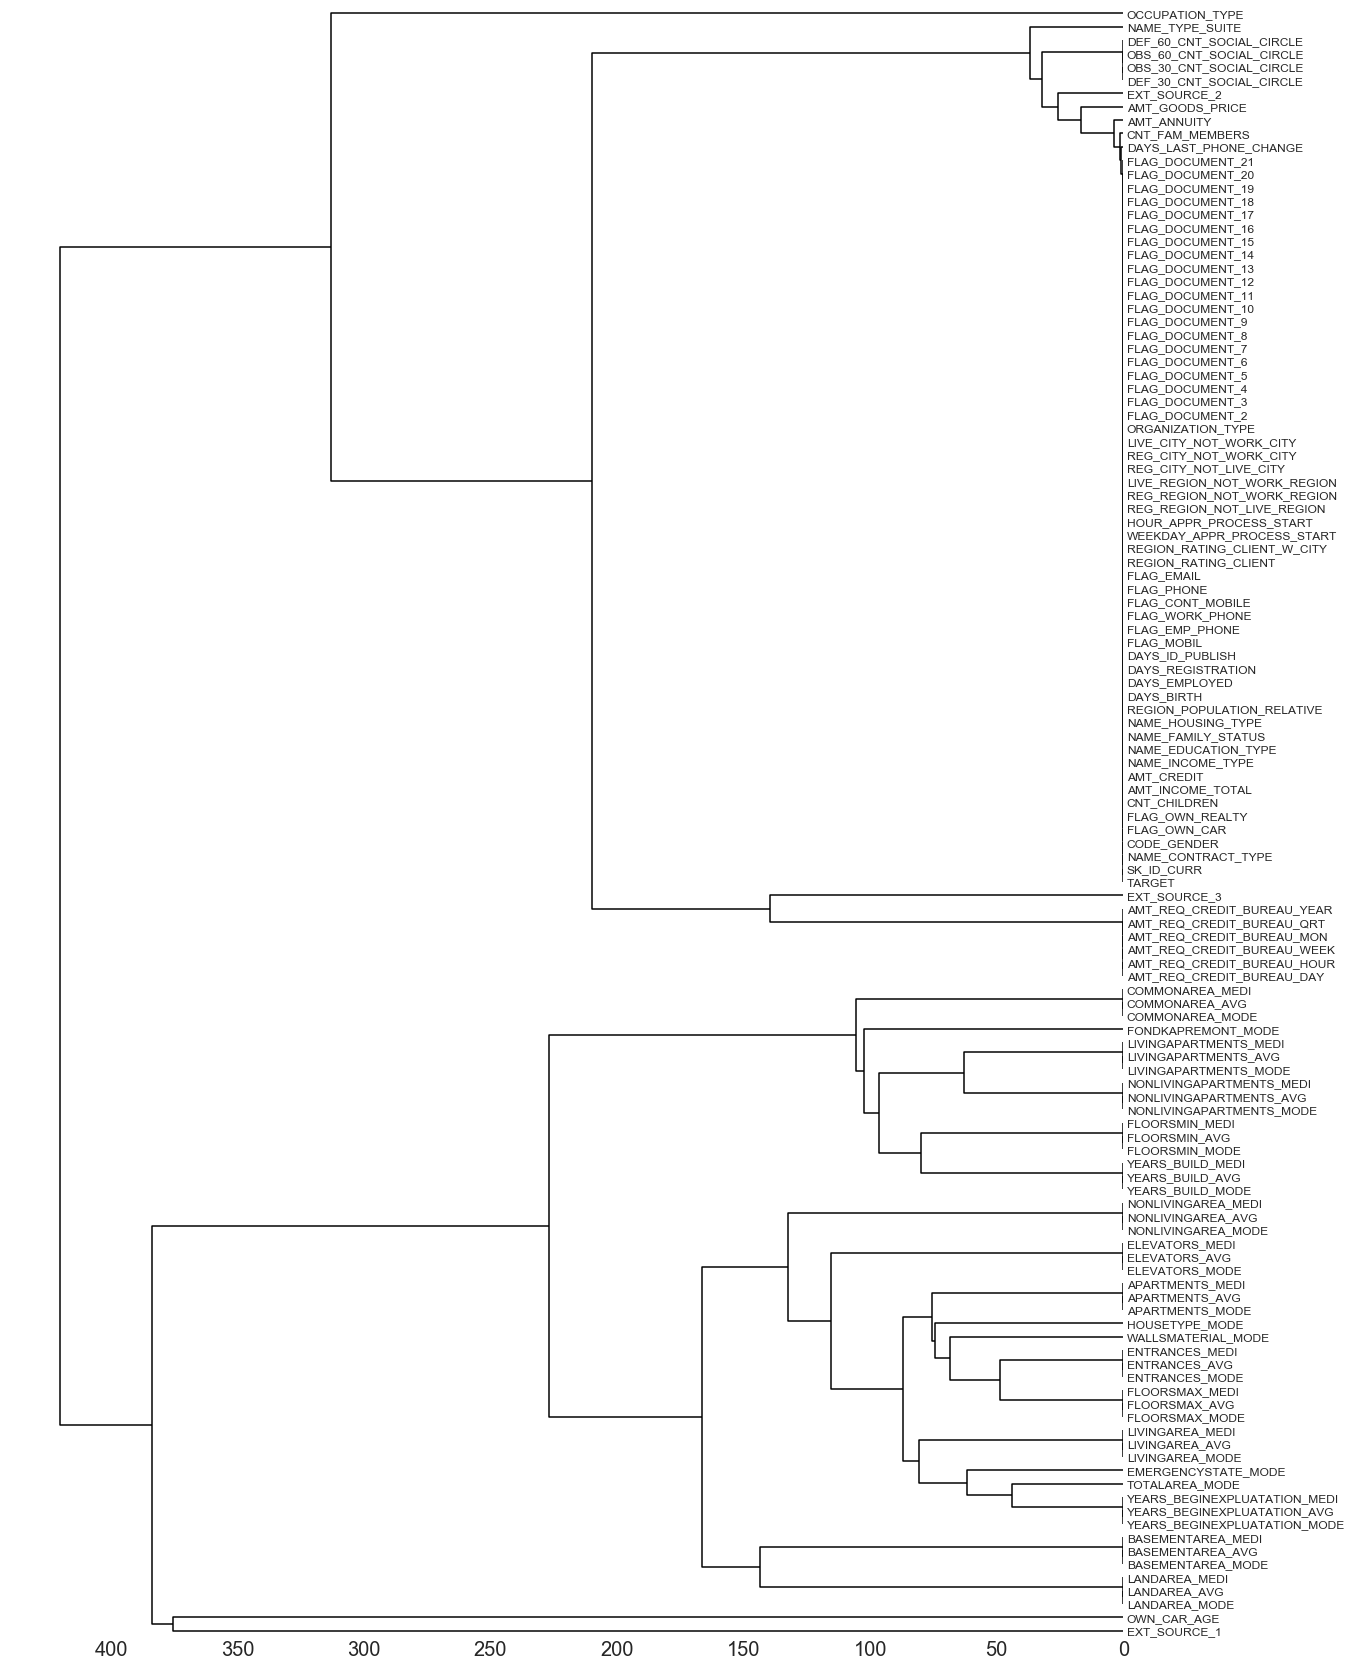

In [17]:
msno.dendrogram(app_train, inline=True, fontsize=12, figsize=(20,30))
#dendrogram clusters the columns based on their missingness

Lots of housing information is missing and appears to have certain missing pattern.

In [4]:
#Extract the housing info related columns using 'AVG','MODE','MEDI' keywords
housing_col = []
for i in list(app_train.columns): 
    if any(x in i for x in ['AVG','MODE','MEDI']):
        housing_col.append(i)
len(housing_col)

47

In [19]:
app_train[housing_col].isnull().sum(axis = 1).mean()

27.196942548396642

The average number of missing value for housing related columns across all records is around 27. Therefore, use 27 as a threshold to separate applications with incomplete housing info and applications with enough(though not complete) hosuing info.

In [20]:
#Calculate the default rate with missing housing value and the ones without missing housing value
print(app_train[app_train[housing_col].isnull().sum(axis = 1) >= 27]['TARGET'].mean())
print(app_train[app_train[housing_col].isnull().sum(axis = 1) < 27]['TARGET'].mean())

0.09125000779967928
0.069277681190916


There are over 2% difference between default rate of applications with over 27 missing hosuing values and the ones with under 27 missing housing values. To ensure the missingness is significant, use Chi-square statistics to test the hypothesis.

In [21]:
from scipy.stats import chi2_contingency

In [478]:
app_train['incomplete'] = 1
app_train.loc[app_train[housing_col].isnull().sum(axis = 1) < 27, 'incomplete'] = 0

In [479]:
cross_tab = pd.crosstab(app_train['incomplete'], app_train['TARGET'])

In [480]:
cross_tab

TARGET,0,1
incomplete,,
0,137047,10201
1,145639,14624


In [481]:
chi2_contingency(cross_tab)

(498.93533227537887,
 1.6203953614015765e-110,
 1,
 array([[ 135360.84279262,   11887.15720738],
        [ 147325.15720738,   12937.84279262]]))

The chi-square is 498.94 and the p-value is extremely small. Consequently, we can reject the null hypothesis that default rate(target) is independent of the completeness of housing info. 

### c. Feature Correlation

In [26]:
app_train.dtypes.value_counts()

float64    65
int64      42
object     16
dtype: int64

In [27]:
numeric_col = list(app_train.select_dtypes(include=['float64', 'int64']).columns)

In [28]:
#Only use the AVG of housing info, exclude MODE or MEDI
subhousing_col = []
for i in housing_col:
    if any(x in i for x in ['MODE','MEDI']):
        subhousing_col.append(i)
#Remove housing related columns
numeric_col = list(set(numeric_col) - set(subhousing_col))

In [29]:
#Removing unnecessary columns
numeric_col.remove('SK_ID_CURR')
numeric_col.remove('TARGET')
numeric_col.remove('incomplete')
print(len(numeric_col))

75


**Correlation between features**

In [31]:
#Calculate correlation between each feature
corr = app_train[numeric_col].corr()

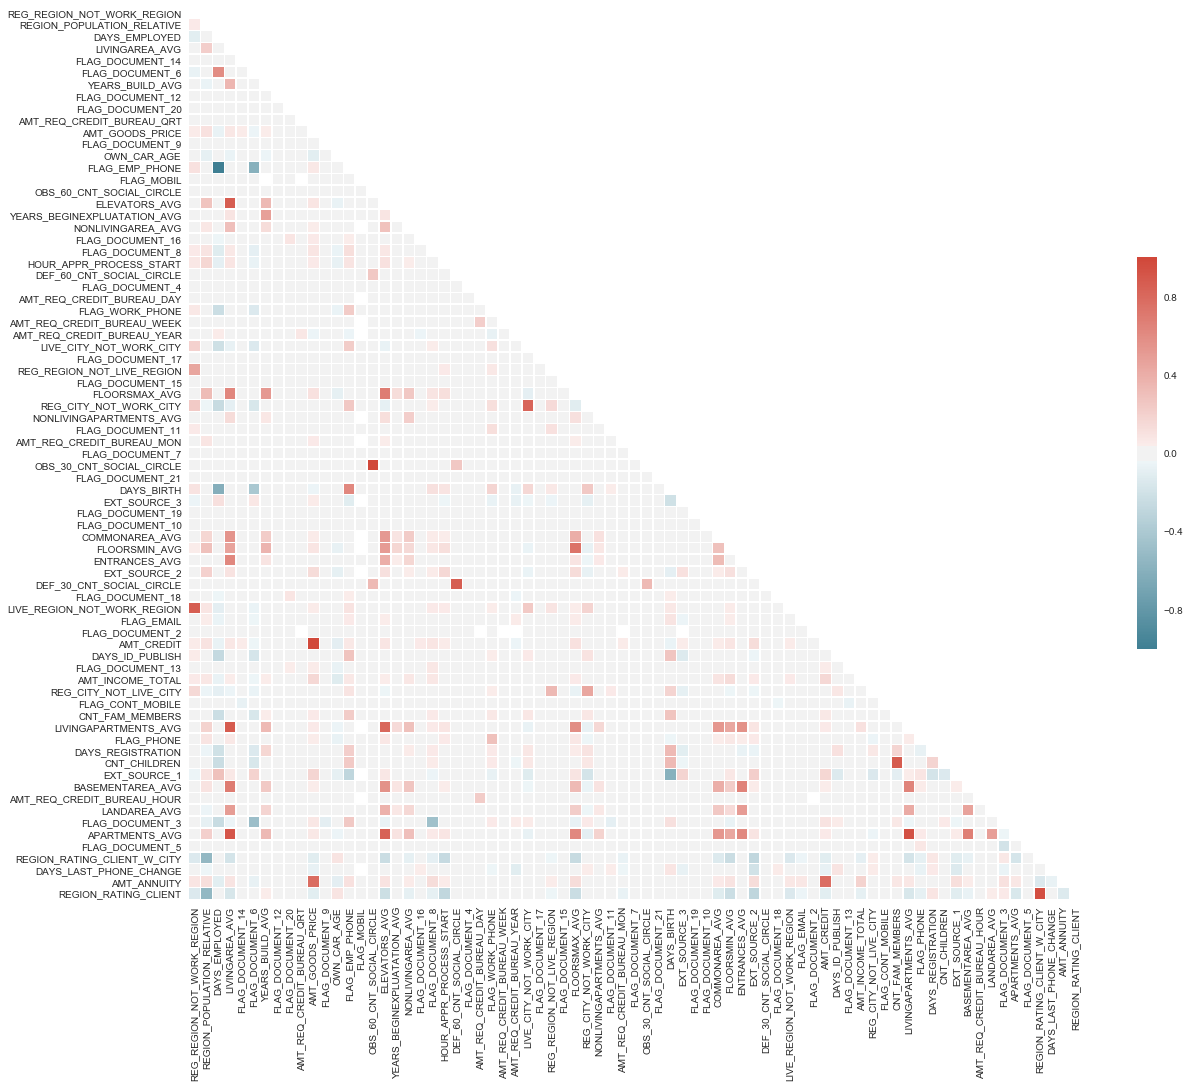

In [32]:
sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros with the same shape and type as a given array.
mask[np.triu_indices_from(mask)] = True #Return the indices for the upper-triangle of arr.
f, ax = plt.subplots(figsize=(20, 18))
cmap = sns.diverging_palette(220, 15, as_cmap=True) #Make a diverging palette between two HUSL colors.
sns.heatmap(corr, mask=mask, cmap= cmap, center=0,
            square=True, linewidths= 0.5, cbar_kws={"shrink": 0.4})
plt.show()

From the correlation matrix above, we can see that there are some variables have strong correlation with each other.
<br>

Highly Positive Correlation:
1. AMT_GOODS_PRICE & AMT_ANNUITY
2. AMT_CREDIT & AMT_ANNUITY
3. LIVE_REGION_NOT_WORK_REGION & REG_REGION_NOT_WORK_REGION
4. REG_REGION_NOT_LIVE_REGION & REG_REGION_NOT_WORK_REGION
5. AMT_GOODS_PRICE & AMT_CREDIT
6. OBS_30_CNT_SOCIAL_CIRCLE & OBS_60_CNT_SOCIAL_CIRCLE
7. FLOORSMAX_AVG & LIVINGAPARTMENTS_AVG
8. COMMONAREA_AVG & LIVINGAPARTMENTS_AVG
9. APARTMENTS_AVG & LIVINGAPARTMENTS_AVG
10. LIVINGAREA_AVG & LIVINGAPARTMENTS_AVG
11. ENTRANCES_AVG & LIVINGAPARTMENTS_AVG
12. BASEMENTAREA_AVG & LIVINGAPARTMENTS_AVG
13. FLOORSMIN_AVG & LIVINGAPARTMENTS_AVG
14. ELEVATORS_AVG & LIVINGAPARTMENTS_AVG
15. NONLIVINGAREA_AVG & LIVINGAPARTMENTS_AVG
16. APARTMENTS_AVG & FLOORSMAX_AVG
17. LIVINGAREA_AVG & FLOORSMAX_AVG
18. FLOORSMIN_AVG & FLOORSMAX_AVG
19. ELEVATORS_AVG & FLOORSMAX_AVG
20. APARTMENTS_AVG & COMMONAREA_AVG
21. LIVINGAREA_AVG & COMMONAREA_AVG
22. ELEVATORS_AVG & COMMONAREA_AVG
23. LIVINGAREA_AVG & APARTMENTS_AVG
24. ENTRANCES_AVG & APARTMENTS_AVG
25. ELEVATORS_AVG & APARTMENTS_AVG
26. REGION_RATING_CLIENT & REGION_RATING_CLIENT_W_CITY
27. LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY
28. CNT_CHILDREN & CNT_FAM_MEMBERS
29. ELEVATORS_AVG & LIVINGAREA_AVG
30. DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_CIRCLE
31. DAYS_BIRTH & FLAG_EMP_PHONE
<br>
-----------------------------------
Highly Negative Correlation:
1. REGION_RATING_CLIENT_W_CITY & REGION_POPULATION_RELATIVE
2. REGION_RATING_CLIENT & REGION_POPULATION_RELATIVE
3. DAYS_BIRTH & EXT_SOURCE_1
4. FLAG_EMP_PHONE & DAYS_EMPLOYED
5. FLAG_DOCUMENT_3 & FLAG_DOCUMENT_8
6. FLAG_DOCUMENT_3 & FLAG_DOCUMENT_6
7. FLAG_EMP_PHONE & FLAG_DOCUMENT_6
8. DAYS_BIRTH & DAYS_EMPLOYED

-----------

**Correlation between target and features**

In [33]:
corr_target = app_train.corr()['TARGET'].sort_values()

In [34]:
print(corr_target.head(5))

EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


In [37]:
print(corr_target.tail(10))

FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64


In [39]:
app_train['DAYS_BIRTH'].head(10)

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
5   -16941
6   -13778
7   -18850
8   -20099
9   -14469
Name: DAYS_BIRTH, dtype: int64

From here, we can see that 'EXT_SOURCE_3', 'EXT_SOURCE_2', and 'EXT_SOURCE_1' have relatively strong negative correlation with target(default or not). On the other hand, 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', and 'REGION_RATING_CLIENT' have relatively higher positive correlation with target. 

Noteworthily, 'DAYS_BIRTH' indicates client's age in days at the time of applicationthe and its value is negative, so that is why its correlation with target is positive. 

In addition, 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' have strong positive correlation with each other. 'DAYS_BIRTH' and 'EXT_SOURCE_1' have strong negative correlation with each other

In [40]:
#Add more visualization later

### d. Categorical and Numerical Variable

In [81]:
#Count the number of unique category in each categorical feature
#pd.Series.nunique: drop NaN value by default
app_train.select_dtypes(include=['object']).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**Small Categorical Variables**

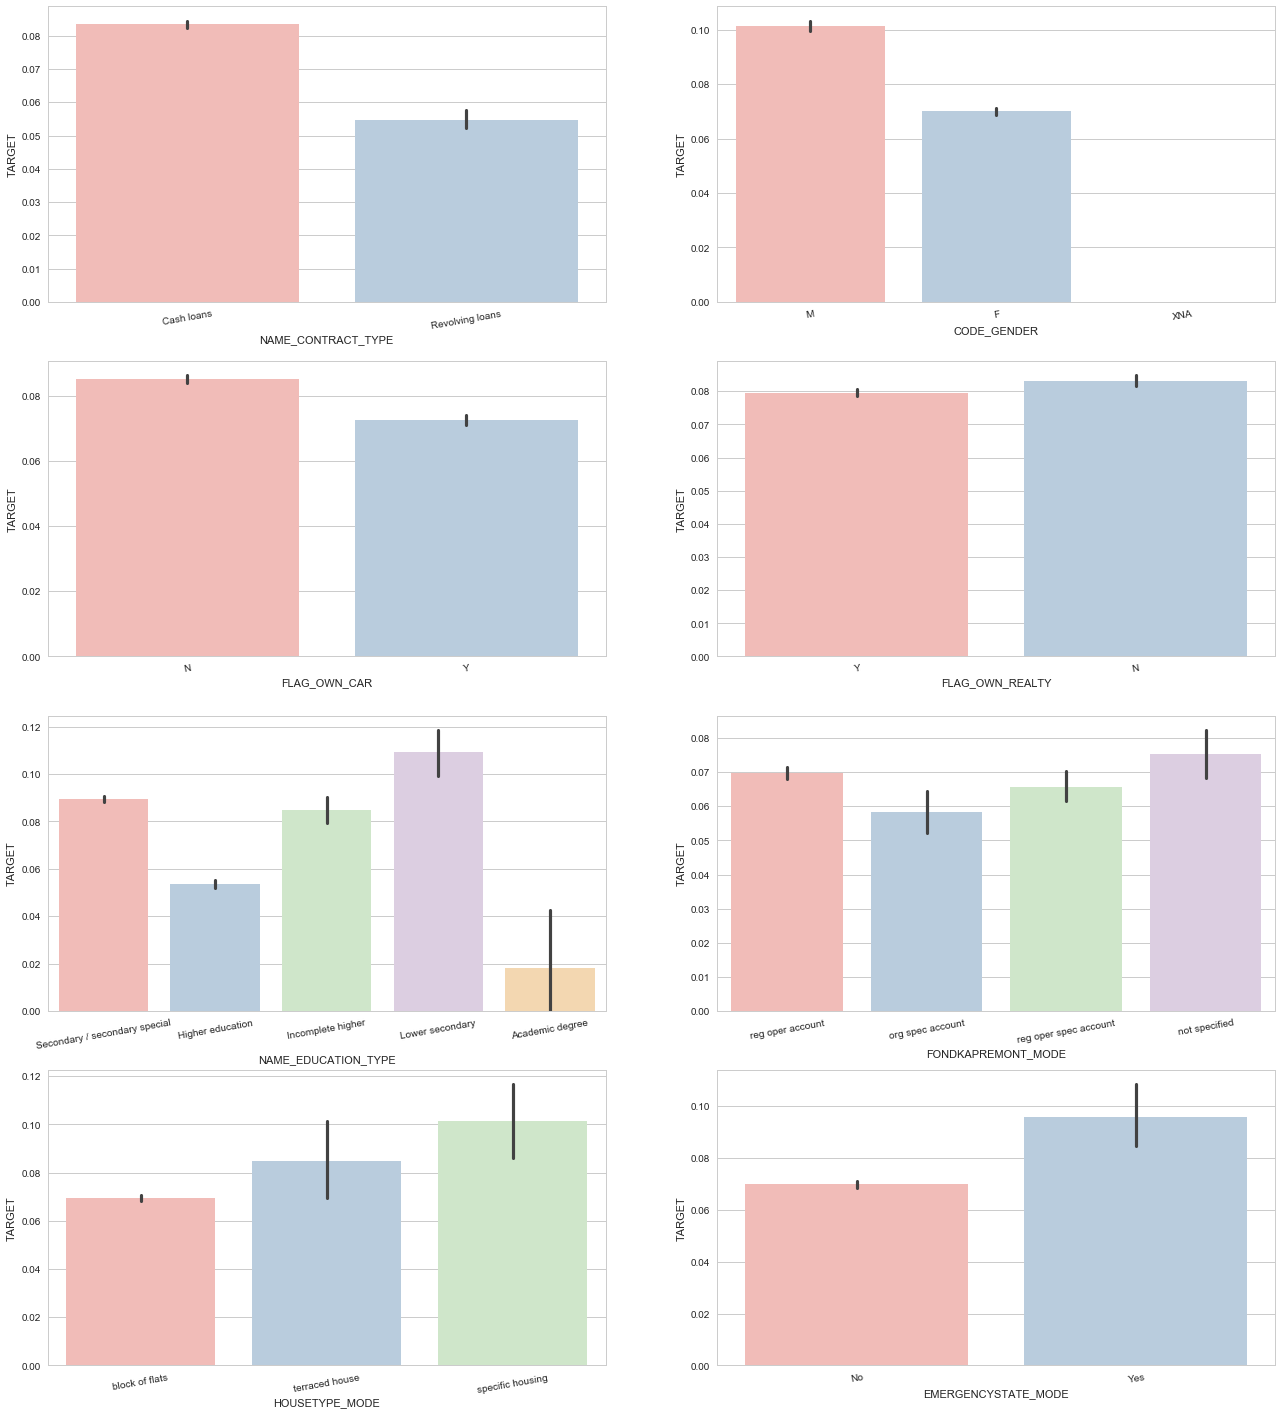

In [137]:
#Plot out categorical variables with small number of categories
small_category = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                  'NAME_EDUCATION_TYPE','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']
sns.set_style('whitegrid')
f, axes = plt.subplots(4, 2, figsize = (22,25))
for i in range(0,len(small_category)):
    sns.barplot(x = small_category[i], y = 'TARGET', data = app_train, ax = axes[int(i/2),int(i%2)], palette= "Pastel1")
    plt.setp(axes[int(i/2),int(i%2)].get_xticklabels(), rotation= 10)

**NAME_TYPE_SUITE (7 categories)**

Who accompanied client when applying for the previous application

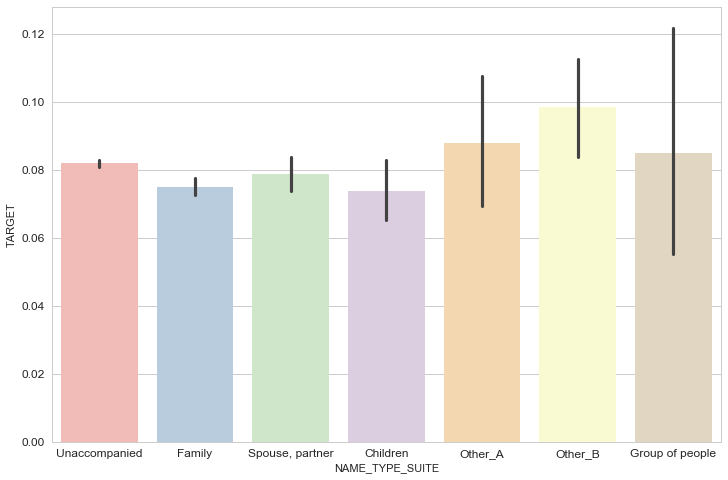

In [148]:
plt.figure(figsize = (12,8))
axis_font = {'size':'12'}
sns.barplot(x="NAME_TYPE_SUITE", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**NAME_INCOME_TYPE (8 categories)**

Clients income type (businessman, working, maternity leave)

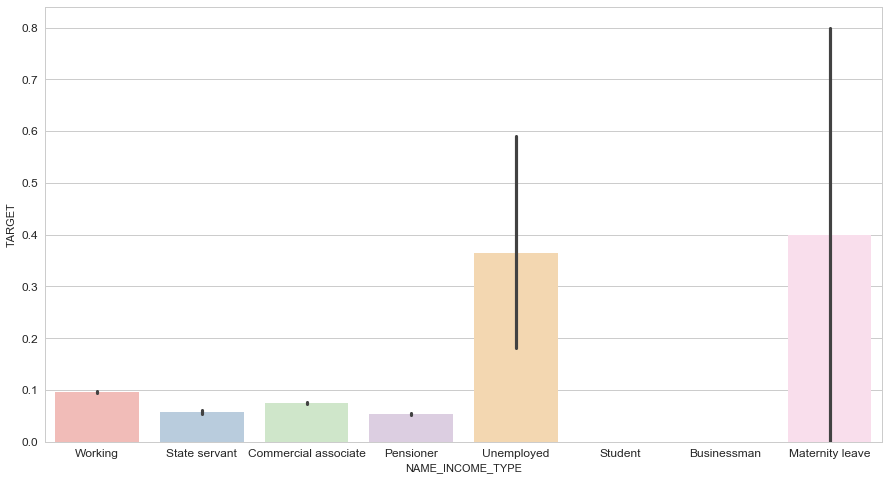

In [151]:
plt.figure(figsize = (15,8))
axis_font = {'size':'12'}
sns.barplot(x="NAME_INCOME_TYPE", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**NAME_FAMILY_STATUS (6 categories)**

Family status of the client

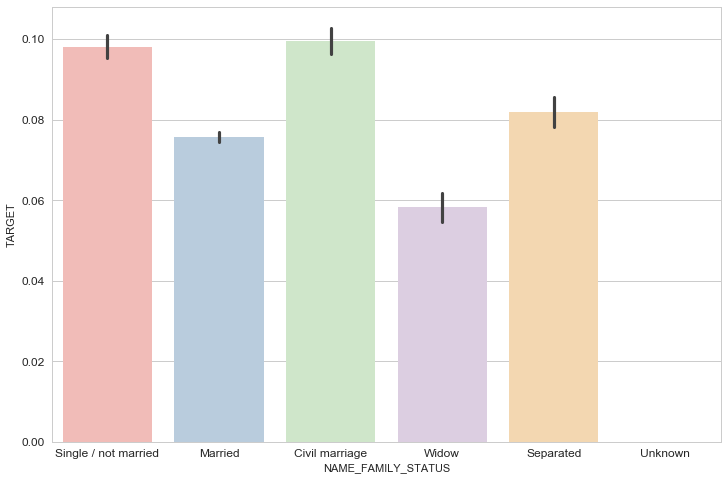

In [150]:
plt.figure(figsize = (12,8))
axis_font = {'size':'12'}
sns.barplot(x="NAME_FAMILY_STATUS", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**NAME_HOUSING_TYPE (6 categories)**

What is the housing situation of the client (renting, living with parents, ...)

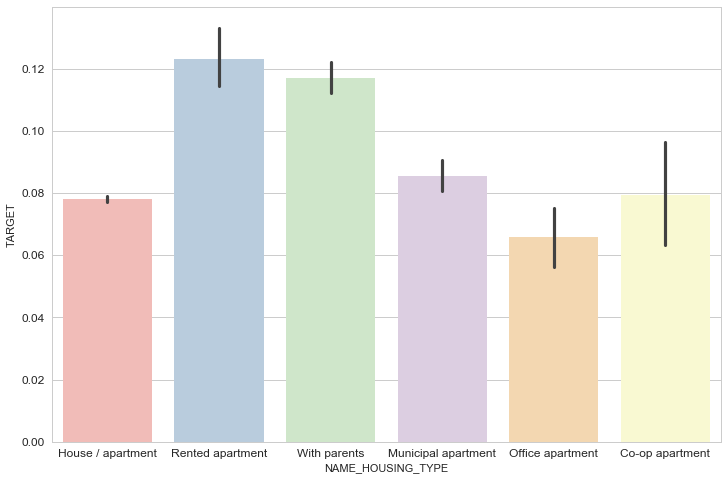

In [152]:
plt.figure(figsize = (12,8))
axis_font = {'size':'12'}
sns.barplot(x="NAME_HOUSING_TYPE", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**OCCUPATION_TYPE (18 categories)**

What kind of occupation does the client have

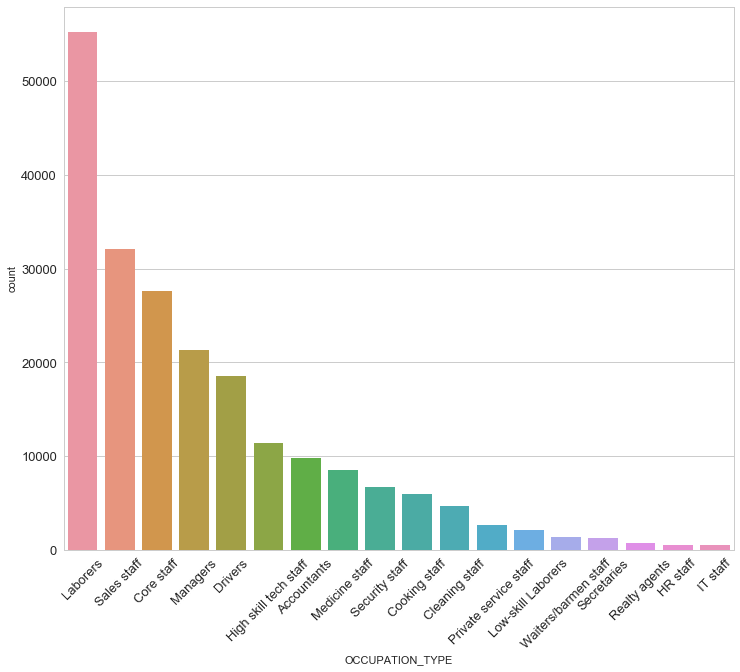

In [165]:
plt.figure(figsize = (12,10))
sns.countplot(x="OCCUPATION_TYPE", data = app_train, order = app_train['OCCUPATION_TYPE'].value_counts().index)
axis_font = {'size':'13'}
plt.xticks(rotation=45, **axis_font)
plt.yticks(**axis_font)
plt.show()

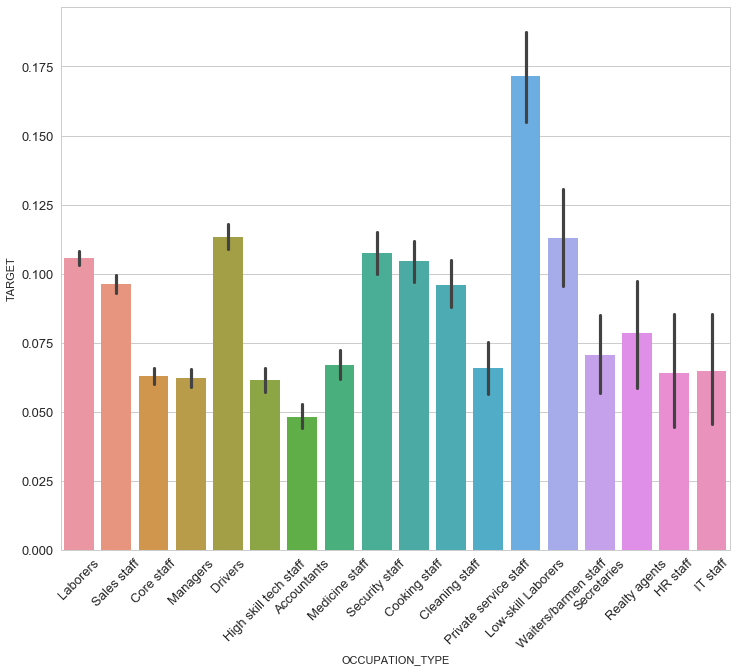

In [179]:
plt.figure(figsize = (12,10))
axis_font = {'size':'13'}
sns.barplot(x="OCCUPATION_TYPE", y="TARGET", data= app_train, order = app_train['OCCUPATION_TYPE'].value_counts().index)
plt.xticks(**axis_font, rotation = 45)
plt.yticks(**axis_font)
plt.show()

**WEEKDAY_APPR_PROCESS_START (7 categories)**

On which day of the week did the client apply for the loan

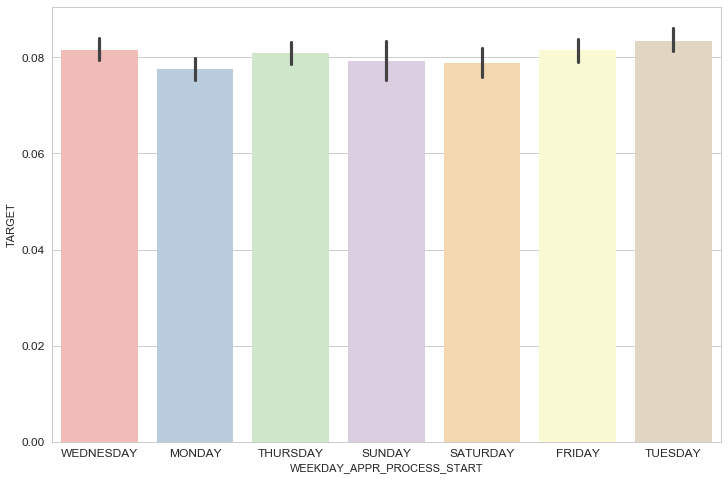

In [169]:
plt.figure(figsize = (12,8))
axis_font = {'size':'12'}
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**ORGANIZATION_TYPE (58 categories)**

Type of organization where client works

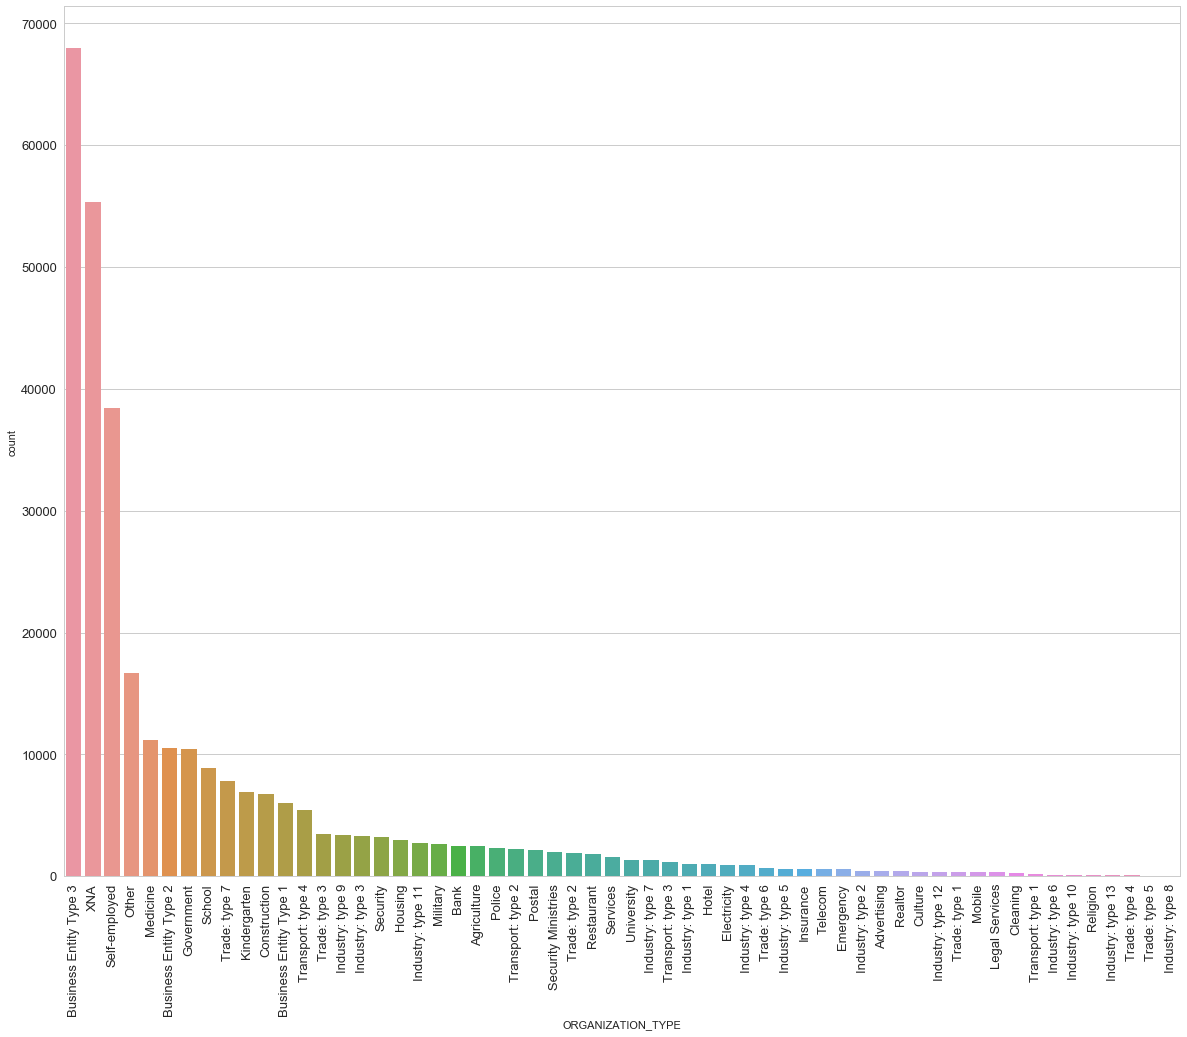

In [175]:
plt.figure(figsize = (20,16))
sns.countplot(x="ORGANIZATION_TYPE", data = app_train, order = app_train['ORGANIZATION_TYPE'].value_counts().index)
axis_font = {'size':'13'}
plt.xticks(rotation=90, **axis_font)
plt.yticks(**axis_font)
plt.show()

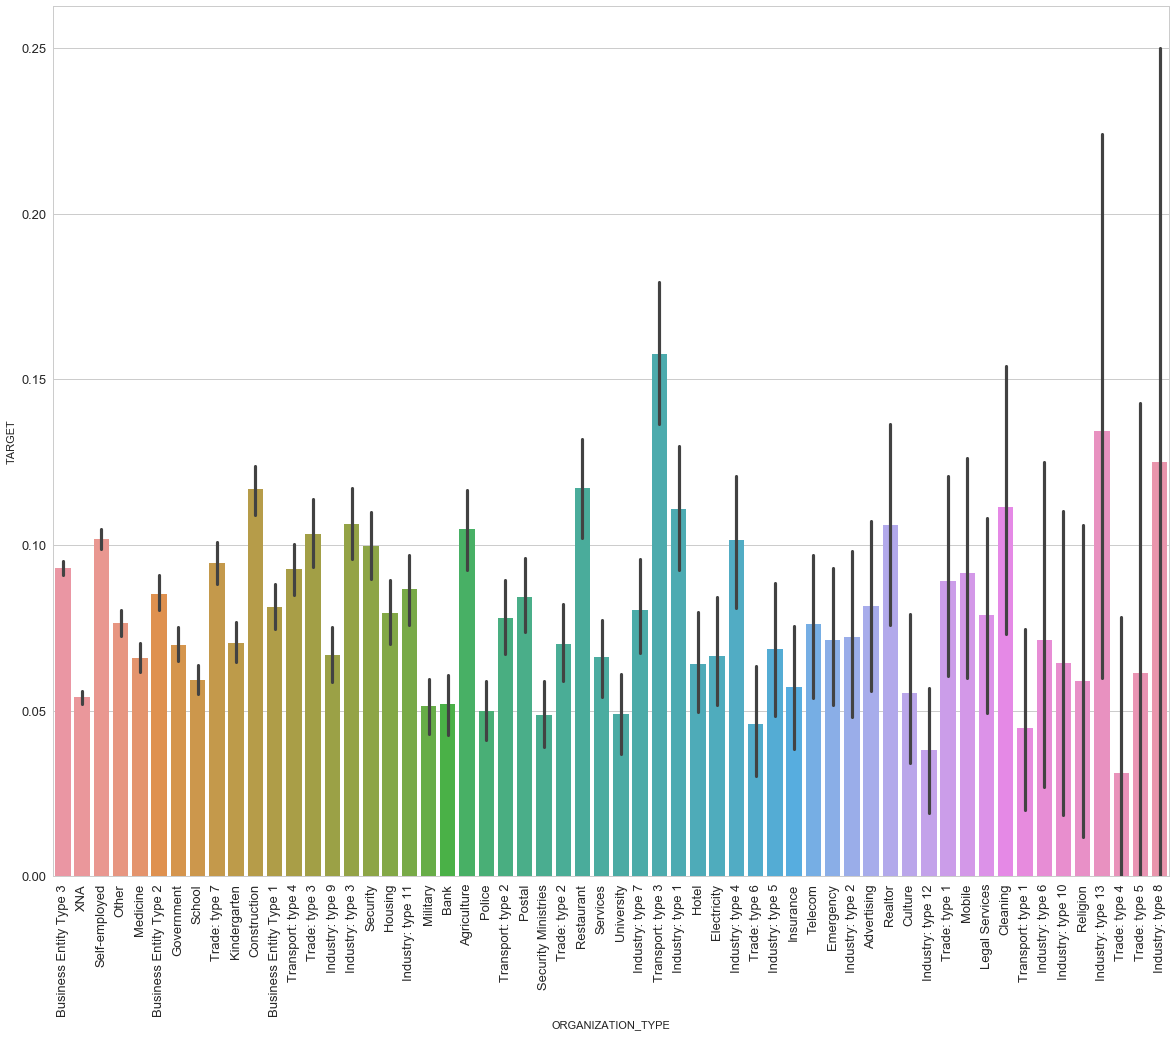

In [178]:
plt.figure(figsize = (20,16))
axis_font = {'size':'13'}
sns.barplot(x="ORGANIZATION_TYPE", y="TARGET", data= app_train, order = app_train['ORGANIZATION_TYPE'].value_counts().index)
plt.xticks(**axis_font, rotation = 90)
plt.yticks(**axis_font)
plt.show()

**WALLSMATERIAL_MODE (7 categories)**

Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

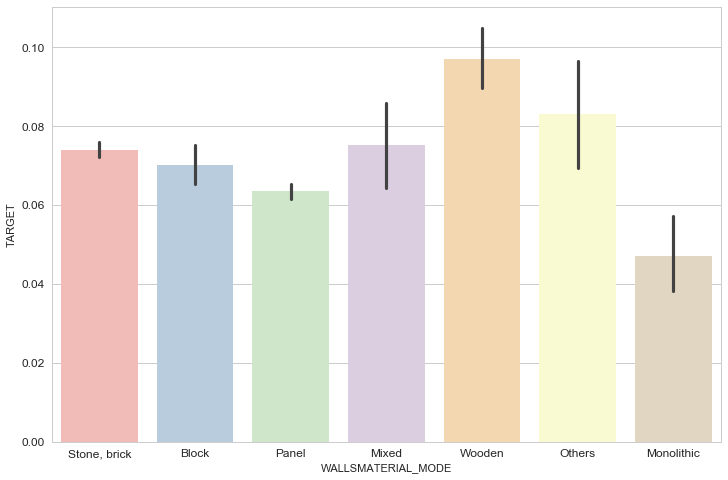

In [170]:
plt.figure(figsize = (12,8))
axis_font = {'size':'12'}
sns.barplot(x="WALLSMATERIAL_MODE", y="TARGET", data= app_train, palette= "Pastel1")
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

--------

In [182]:
print(app_train.select_dtypes(include=['float64']).columns)
print(app_train.select_dtypes(include=['int64']).columns)

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

Pick some numerical variables to do visualization

**DAYS_BIRTH**

Client's age in days at the time of application

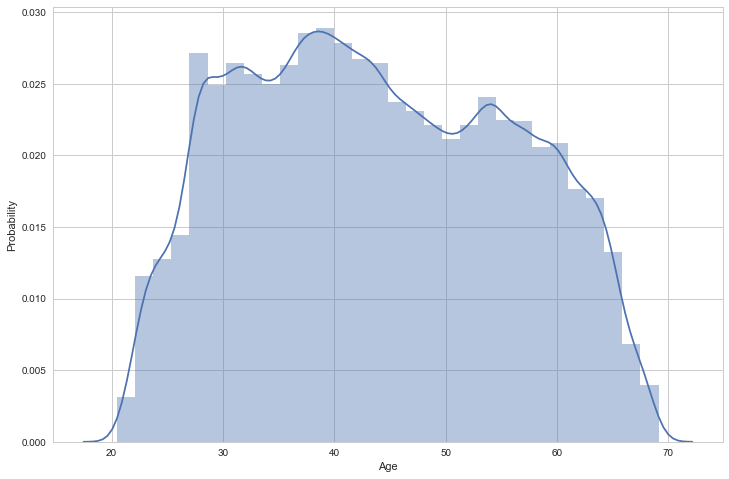

In [226]:
plt.figure(figsize = (12,8))
sns.distplot(abs(app_train['DAYS_BIRTH'])/365, bins = 30)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

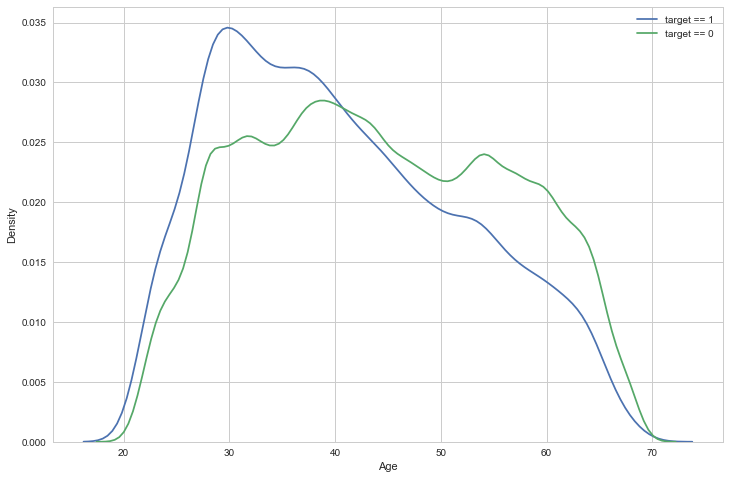

In [225]:
plt.figure(figsize = (12,8))
sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'])/365, label = 'target == 1')
sns.kdeplot(abs(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'])/365, label = 'target == 0')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

**REGION_RATING_CLIENT**

Our rating of the region where client lives (1,2,3)

In [239]:
#Convert 'REGION_RATING_CLIENT' to categorical variable
app_train['REGION_RATING_CLIENT'] = app_train['REGION_RATING_CLIENT'].astype('category')

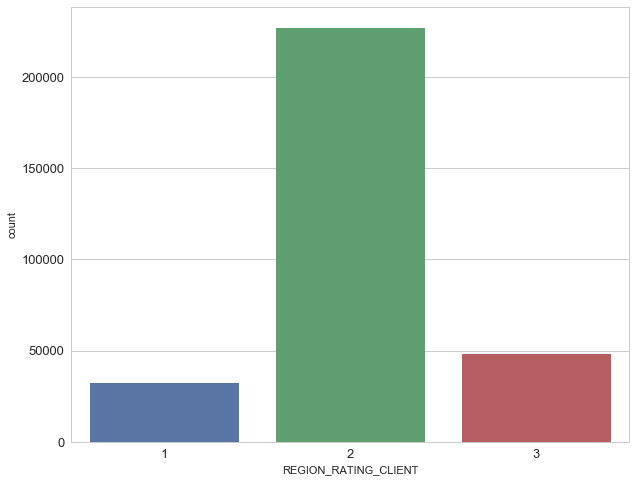

In [247]:
plt.figure(figsize = (10,8))
sns.countplot(x='REGION_RATING_CLIENT', data = app_train)
axis_font = {'size':'13'}
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

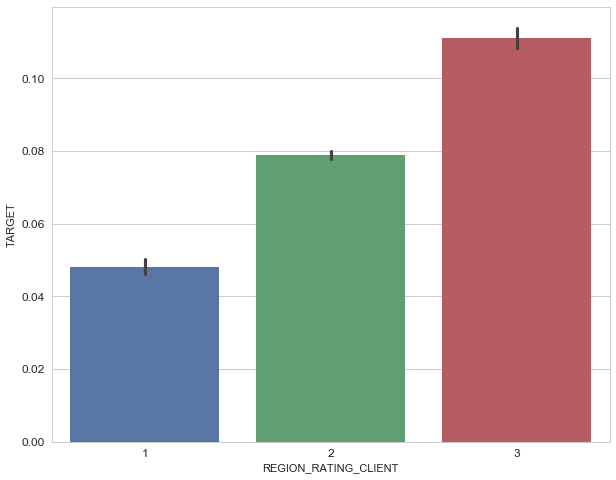

In [248]:
plt.figure(figsize = (10,8))
axis_font = {'size':'12'}
sns.barplot(x='REGION_RATING_CLIENT', y='TARGET', data= app_train)
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**REGION_RATING_CLIENT_W_CITY**

Our rating of the region where client lives with taking city into account (1,2,3)

In [244]:
#Convert 'REGION_RATING_CLIENT_W_CITY' to categorical variable
app_train['REGION_RATING_CLIENT_W_CITY'] = app_train['REGION_RATING_CLIENT_W_CITY'].astype('category')

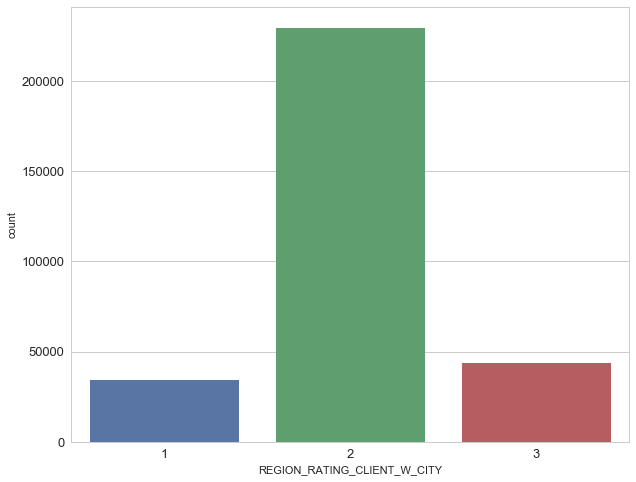

In [249]:
plt.figure(figsize = (10,8))
sns.countplot(x='REGION_RATING_CLIENT_W_CITY', data = app_train)
axis_font = {'size':'13'}
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

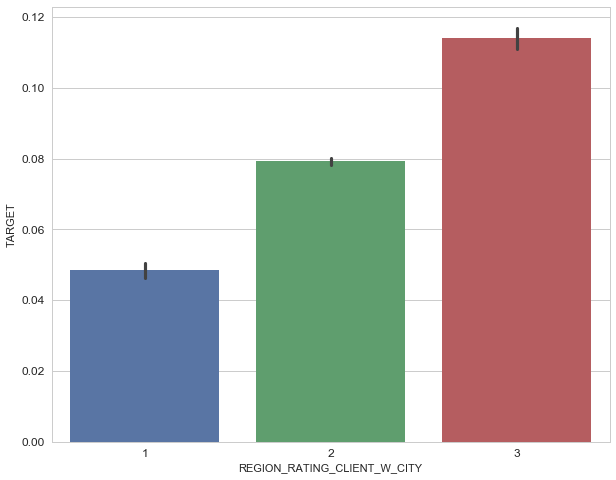

In [250]:
plt.figure(figsize = (10,8))
axis_font = {'size':'12'}
sns.barplot(x='REGION_RATING_CLIENT_W_CITY', y='TARGET', data= app_train)
plt.xticks(**axis_font)
plt.yticks(**axis_font)
plt.show()

**EXT_SOURCE_1 & EXT_SOURCE_2 & EXT_SOURCE_3**

Normalized score from external data source

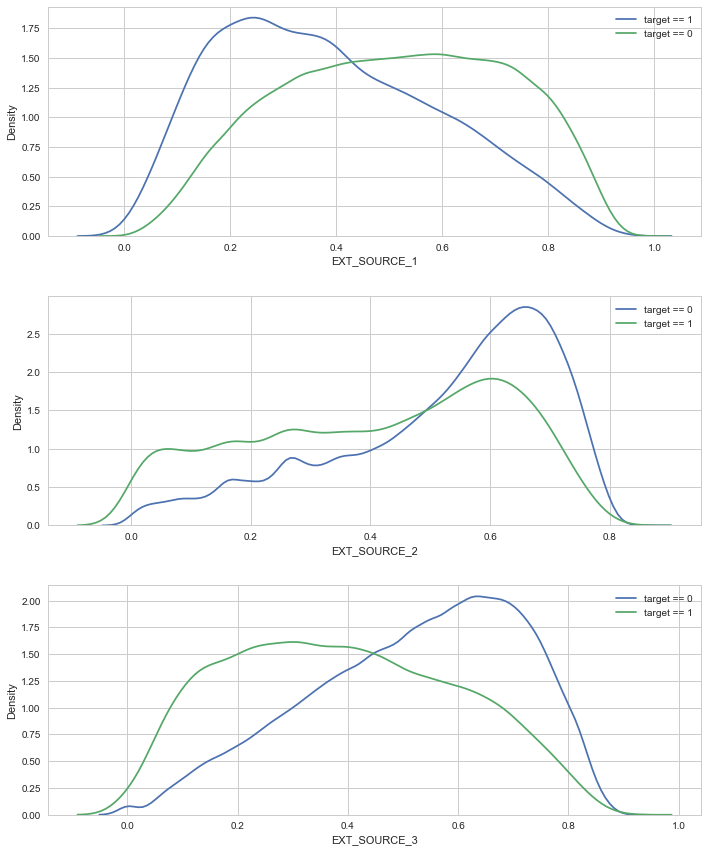

In [236]:
plt.figure(figsize = (10, 12))
for i, var in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    if i == 0:
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, var], label = 'target == 1')
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, var], label = 'target == 0')
    else:
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, var], label = 'target == 0')
        sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, var], label = 'target == 1')
    plt.xlabel('%s' % var)
    plt.ylabel('Density')  
plt.tight_layout(h_pad = 2.5)

In [ ]:
#Add more visualization later

## 1.2 bureau

> - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
> - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


In [251]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [252]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


## 1.3 bureau_bal

> - Monthly balances of previous credits in Credit Bureau.<br>
> - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample x # of relative previous credits x # of months where we have some history observable for the previous credits) rows.

In [254]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [258]:
bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


## 1.4 credit_card_bal	

> - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
> - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample x # of relative previous credit cards x # of months where we have some history observable for the previous credit card) rows.

In [265]:
credit_card_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [266]:
credit_card_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF                    int64
dtypes: float64(15), int64(7

## 1.5 installments

> - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
> - There is a) one row for every payment that was made plus b) one row each for missed payment.
> - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

In [272]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [273]:
installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


## 1.6 pos_cash_bal

> - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
> - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample x # of relative previous credits x # of months in which we have some history observable for the previous credits) rows.

In [274]:
pos_cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [276]:
pos_cash_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


## 1.7 previous_app

> - All previous applications for Home Credit loans of clients who have loans in our sample.
> - There is one row for each previous application related to loans in our data sample.

In [277]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

# Part 2: Data Preparation

## 2.1 Combine app_train with app_test

In [283]:
app_train.drop('incomplete', axis = 1, inplace= True)

In [124]:
app_train['is_train'] = 1
app_test['is_train'] = 0
train_id = app_train['SK_ID_CURR']
test_id = app_test['SK_ID_CURR']

In [125]:
data = pd.concat([app_train.drop('TARGET', axis = 1), app_test], axis=0)

In [126]:
data.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_train
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


## 2.2 One-Hot Encoding

In [7]:
def _get_categorical_features(df):
    feature = list(df.select_dtypes(include=['object']).columns)
    return feature
def _get_dummies(df, features):
    for col in features:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df     

In [140]:
data =_get_dummies(data, _get_categorical_features(data))
bureau = _get_dummies(bureau, _get_categorical_features(bureau))
bureau_bal = _get_dummies(bureau_bal, _get_categorical_features(bureau_bal))
credit_card_bal = _get_dummies(credit_card_bal, _get_categorical_features(credit_card_bal))
pos_cash_bal = _get_dummies(pos_cash_bal, _get_categorical_features(pos_cash_bal))
previous_app = _get_dummies(previous_app, _get_categorical_features(previous_app))

## 2.3 Feature Engineering

### 2.3.1 bureau

In [9]:
#Join previous_app with bureau_bal using 'SK_ID_BUREAU'
bureau_bal['SK_ID_BUREAU'] = bureau_bal['SK_ID_BUREAU'].astype(str)
bureau_bal_avg = bureau_bal.groupby('SK_ID_BUREAU').mean()
bureau = bureau.merge(right = bureau_bal_avg.reset_index(), how = 'inner', on = 'SK_ID_BUREAU')

In [10]:
#Convert identification columns into appropriate datatype
bureau['SK_ID_CURR'] = bureau['SK_ID_CURR'].astype(str)
bureau['SK_ID_BUREAU'] = bureau['SK_ID_BUREAU'].astype(str)

In [11]:
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['bureau_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']

In [12]:
#Join with data using 'SK_ID_CURR'
data['SK_ID_CURR'] = data['SK_ID_CURR'].astype(str)
data = data.merge(right = bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.2 credit_card_bal

In [13]:
credit_card_bal['SK_ID_CURR'] = credit_card_bal['SK_ID_CURR'].astype(str)
credit_card_bal['SK_ID_PREV'] = credit_card_bal['SK_ID_PREV'].astype(str)

In [14]:
cc_avg = credit_card_bal.groupby('SK_ID_CURR').mean()
cc_avg['cc_prev_count'] = credit_card_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()['SK_ID_PREV']
data = data.merge(right= cc_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.3 installments

In [15]:
installments['SK_ID_CURR'] = installments['SK_ID_CURR'].astype(str)
installments['SK_ID_PREV'] = installments['SK_ID_PREV'].astype(str)

In [16]:
inst_avg = installments.groupby('SK_ID_CURR').mean()
inst_avg['inst_prev_count'] = installments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()['SK_ID_PREV']
data = data.merge(right= inst_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.4 pos_cash_bal

In [17]:
pos_cash_bal['SK_ID_CURR'] = pos_cash_bal['SK_ID_CURR'].astype(str)
pos_cash_bal['SK_ID_PREV'] = pos_cash_bal['SK_ID_PREV'].astype(str)

In [18]:
pos_avg = pos_cash_bal.groupby('SK_ID_CURR').mean()
pos_avg['pos_prev_count'] = pos_cash_bal[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()['SK_ID_PREV']
data = data.merge(right= pos_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.5 previous_app

In [19]:
previous_app['SK_ID_CURR'] = previous_app['SK_ID_CURR'].astype(str)
previous_app['SK_ID_PREV'] = previous_app['SK_ID_PREV'].astype(str)

In [20]:
previous_avg = previous_app.groupby('SK_ID_CURR').mean()
previous_avg['prev_count'] = previous_app[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()['SK_ID_PREV']
data = data.merge(right= previous_avg.reset_index(), how='left', on='SK_ID_CURR')

### 2.3.6 data: 'CREDIT_INCOME_PERCENT' & 'ANNUITY_INCOME_PERCENT'

In [21]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT_x']/data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY_x']/data['AMT_INCOME_TOTAL']

## 2.4 Missing Value Handling: create dummy indicator for large % of missingness

In [22]:
(data.isnull().sum(axis = 1) > 0).sum()/len(data)

1.0

 - According to the above result, every record has missing values.

In [23]:
data_missing = data.isnull().sum()[data.isnull().sum() != 0]/len(data)*100

 - Drop columns with over 70% missingness

In [24]:
for col in list(data_missing[data_missing > 70].index):
    data.drop(col, axis = 1, inplace= True)

 - Create dummy indicator for housing missing value

In [25]:
#The average number of missing values in housing columns across all records
data[housing_col].isnull().sum(axis = 1).mean()

27.09662460877742

In [26]:
data['housing_half_incomplete'] = 1
data.loc[data[housing_col].isnull().sum(axis = 1) < 27, 'housing_half_incomplete'] = 0

In [27]:
data.drop(housing_col, axis = 1, inplace= True)

 - Ceate dummy indicator for 'OWN_CAR_AGE' (66.03%), 'EXT_SOURCE_1' (54.43%), and 'OCCUPATION_TYPE' (31.44%)

In [28]:
data['OWN_CAR_AGE_missing'] = 0
data.loc[data['OWN_CAR_AGE'].isnull(), 'OWN_CAR_AGE_missing'] = 1

In [29]:
data['EXT_SOURCE_1_missing'] = 0
data.loc[data['EXT_SOURCE_1'].isnull(), 'EXT_SOURCE_1_missing'] = 1

In [30]:
data['OCCUPATION_TYPE_missing'] = 0
data.loc[data['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE_missing'] = 1

In [31]:
data.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'OCCUPATION_TYPE'], axis = 1, inplace= True)

 - The rest missing value columns are less that 20%.
 - Use column mean to impute the missing values, assuming missing completely at random.

## 2.5 Data Preprocess

In [34]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest,prev_count,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,housing_half_incomplete,OWN_CAR_AGE_missing,EXT_SOURCE_1_missing,OCCUPATION_TYPE_missing
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.0,1.0,0.0,1.0,2.007889,0.121978,0,1,0,0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.0,0.0,0.0,3.0,4.790750,0.132217,0,1,0,0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,1.0,0.0,0.0,1.0,2.000000,0.100000,1,0,1,0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,9.0,2.316167,0.219900,1,1,1,0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.0,0.0,0.0,6.0,4.222222,0.179963,1,1,1,0


In [35]:
col = list(set(list(data.columns)) - set(list(data.select_dtypes(include=['object']).columns)))
col.remove('is_train')

In [112]:
train = data[data['is_train'] == 1][col]
test = data[data['is_train'] == 0][col]

In [37]:
X = np.array(train)
y = np.array(app_train['TARGET'])

In [38]:
print(X.shape)
print(y.shape)

(307511, 388)
(307511,)


- Missing value imputation: replace with column mean

In [39]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
X_imputed = imputer.fit_transform(X)

In [42]:
from collections import Counter
Counter(y).items()

dict_items([(1, 24825), (0, 282686)])

In [43]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X_imputed, y)

In [44]:
Counter(y_resampled).items()

dict_items([(1, 282686), (0, 282686)])

- Standardize the data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_resampled)

- Train-test split

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized , y_resampled, test_size=0.2)

In [64]:
print(X_train.shape)
print(X_test.shape)

(452297, 388)
(113075, 388)


# Part 3: Modeling

- Baseline: Naive Bayes

In [52]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

In [53]:
error_nb = np.mean(pred_nb[:, np.newaxis] == y_test)
print(error_nb)

0.5000032601


In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_nb)

0.73527908602406022

- Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [56]:
error_lr = np.mean(pred_lr[:, np.newaxis] == y_test)
print(error_lr)

0.49998884444


In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_lr)

0.7141393596711374

- XGBoost

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

In [61]:
error_xgb = np.mean(pred_xgb[:, np.newaxis] == y_test)
print(error_xgb)

0.500063218935


In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_xgb)

0.95497634931077235

- neural network

In [155]:
from keras import models
from keras import layers

nn = models.Sequential() 
nn.add(layers.Dense(388, input_dim=388, kernel_initializer='normal', activation='relu'))
nn.add(layers.Dense(100, kernel_initializer='normal', activation='relu'))
nn.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
nn.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 388)               150932    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               38900     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 189,933
Trainable params: 189,933
Non-trainable params: 0
_________________________________________________________________


In [160]:
nn.fit(X_train, y_train,epochs= 10, batch_size= 300)
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0927 - acc: 0.9690
Epoch 2/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0776 - acc: 0.9746
Epoch 3/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0698 - acc: 0.9773
Epoch 4/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0634 - acc: 0.9796
Epoch 5/10
452297/452297 [==============================] - 20s 43us/step - loss: 0.0583 - acc: 0.9813
Epoch 6/10
452297/452297 [==============================] - 20s 43us/step - loss: 0.0541 - acc: 0.9827
Epoch 7/10
452297/452297 [==============================] - 20s 43us/step - loss: 0.0500 - acc: 0.9841
Epoch 8/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0484 - acc: 0.9851
Epoch 9/10
452297/452297 [==============================] - 20s 44us/step - loss: 0.0455 - acc: 0.9859
Epoch 10/10
113075/113075 [==============================] - 7s 63us/step

In [161]:
pred_nn = nn.predict(X_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_nn)

0.98360486440967942

-------------

## Part 4: Prediction

In [162]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
test_imputed = imputer.fit_transform(test)
Xnew = scaler.transform(test_imputed)

### Choose Neural Network Model to Predict

In [163]:
ynew = nn.predict_proba(Xnew)
result = pd.DataFrame(columns = ['SK_ID_CURR', 'TARGET'])
result['SK_ID_CURR'] = app_test['SK_ID_CURR']
target = pd.DataFrame(ynew)
result['TARGET'] = target[0]
result.to_csv('home_credit_default_risk_submission.csv')

Reference:
1. https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
2. https://www.kaggle.com/jpmiller/patterns-of-missing-data
3. https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772
4. https://seaborn.pydata.org/examples/many_pairwise_correlations.html